# COURSE: A deep understanding of deep learning

## SECTION: ANNs

### LECTURE: ANN for regression

#### TEACHER: Mike X Cohen, sincxpress.com

##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210


In [1]:
# import libraries
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
device, torch.cuda.get_device_name()


(device(type='cuda', index=0), 'NVIDIA GeForce GTX 1650')

In [3]:
def t2p(x: torch.Tensor) -> np.ndarray:
    return x.detach().cpu().numpy().flatten()


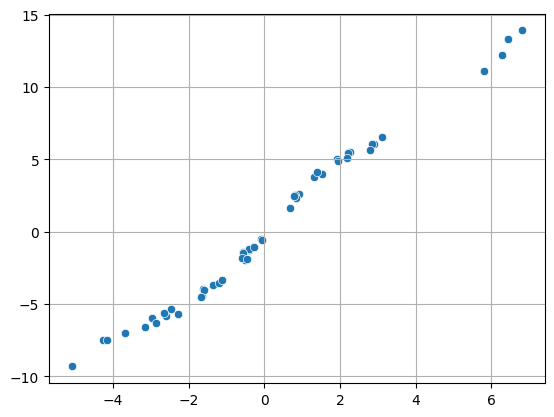

In [4]:
def gen_data(N, slope):
    # create data
    x = torch.randn(N, 1, device=device) * 3
    y = x * slope + torch.sin(x) + torch.randn(N, 1, device=device) / 5
    return x, y

x, y = gen_data(50, 2)
# and plot
sns.scatterplot(x=t2p(x), y=t2p(y))
plt.grid()
plt.show()


In [5]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 10),  # input layer
    nn.Tanh(),  # activation function
    nn.Linear(10, 5),  # output layer
    nn.Tanh(),  # activation function
    nn.Linear(5, 1),  # output layer
).to(device)


In [6]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)


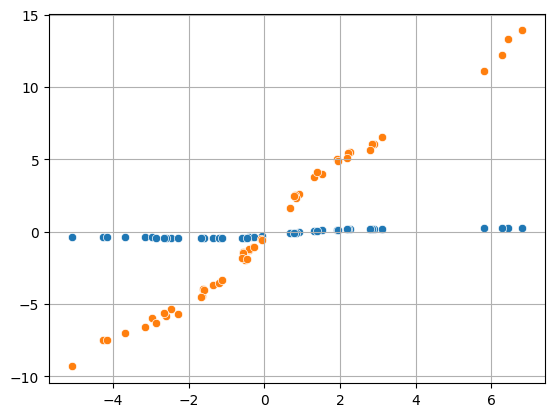

In [7]:
sns.scatterplot(x=t2p(x), y=t2p(ANNreg(x)))
sns.scatterplot(x=t2p(x), y=t2p(y))
plt.grid()
plt.show()


In [8]:
# train the model
numepochs = 5000
try:
    losses
except NameError:
    losses = torch.zeros(0, device=device)


## Train the model!
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses = torch.cat((losses, loss.view(1)), 0)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


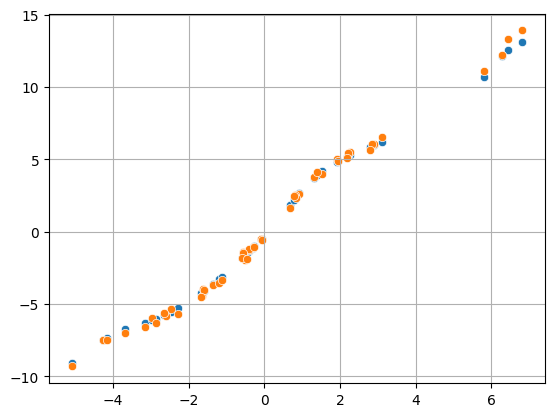

In [9]:
sns.scatterplot(x=t2p(x), y=t2p(ANNreg(x)))
sns.scatterplot(x=t2p(x), y=t2p(y))
plt.grid()
plt.show()


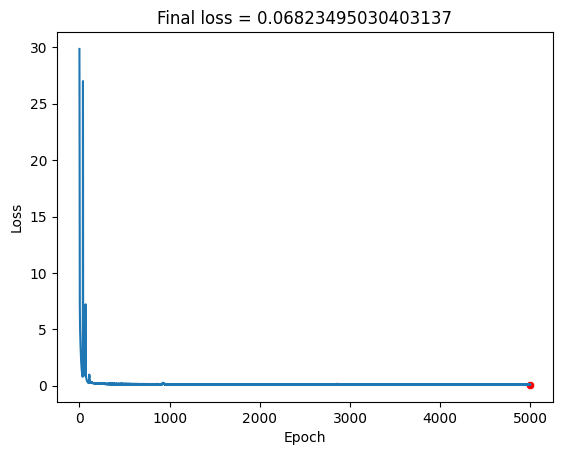

In [12]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()
plt.figure()
sns.lineplot(data=t2p(losses))
sns.scatterplot(x=losses.size().numel(), y=t2p(testloss), color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Final loss = {testloss.item()}")
plt.show()
plt.close()

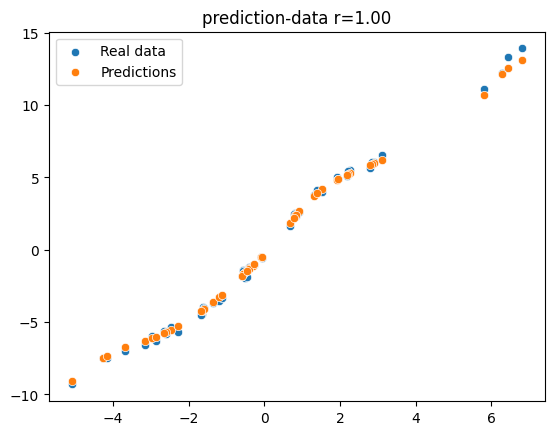

In [13]:
# plot the data
sns.scatterplot(x=t2p(x), y=t2p(y), label="Real data")
sns.scatterplot(x=t2p(x), y=t2p(predictions), label="Predictions")
plt.title(f"prediction-data r={np.corrcoef(t2p(y).T,t2p(predictions).T)[0,1]:.2f}")
plt.legend()
plt.show()


# Code Challenge

In [1]:
# import libraries
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
def t2p(x: torch.Tensor) -> np.ndarray:
    return x.detach().cpu().numpy().flatten()


In [3]:
def gen_data(N, slope):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x = torch.randn(N, 1, device=device)
    y = x * slope + torch.randn(N, 1, device=device) #+ torch.sin(x)
    return x, y

In [4]:
class ANNModel:
    def __init__(self, learningRate=0.05, numepochs=1000, device=None):
        self.device = (
            device
            if device
            else torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        )

        self.numepochs = numepochs
        self.losses = torch.zeros(0, device=self.device)

        self.lossfun = nn.MSELoss()
        self.ANNreg = self.model()
        self.optimizer = torch.optim.SGD(self.ANNreg.parameters(), lr=learningRate)

    def model(self):
        return nn.Sequential(
            nn.Linear(1, 1),  # input layer
            nn.ReLU(),  # activation function
            #nn.Linear(10, 5),  # output layer
            #nn.Tanh(),  # activation function
            nn.Linear(1, 1),  # output layer
        ).to(self.device)

    def train(self, x, y):
        for epochi in range(self.numepochs):
            yHat = self.ANNreg(x)
            loss = self.lossfun(yHat, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            self.losses = torch.cat((self.losses, loss.view(1)), 0)

    def get_testloss(self, x, y):
        predictions = self.ANNreg(x)
        testloss = (predictions - y).pow(2).mean()
        return t2p(testloss)

    def plot_losses(self, x, y):
        testloss = self.get_testloss()
        samples = self.losses.size().numel()

        plt.figure()
        sns.lineplot(data=t2p(self.losses), color="blue")
        sns.scatterplot(x=samples, y=t2p(testloss), color="red")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"Final loss = {testloss.item():.3f}\nLast loss = {t2p(self.losses)[-1]:.3f}\nDiff loss = {t2p(self.losses)[-1]-testloss.item():.3f}")
        plt.show()
        plt.close()


In [5]:
losses = []
y_hat = []
for slope in np.linspace(-2, 2, 50):
    model = ANNModel()
    x, y = gen_data(50, slope)
    model.train(x, y)
    y_hat.append(model.ANNreg(x))
    # model.plot_losses(x, y)
    losses.append(float(model.get_testloss(x, y)))

In [6]:
y_hat = [t2p(h) for h in y_hat]
y_hat = np.array(y_hat)
y_np = t2p(y)
correlation = np.array([np.corrcoef(y_np, hat)[0,1] for hat in y_hat])
correlation[np.isnan(correlation)] = 0

/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


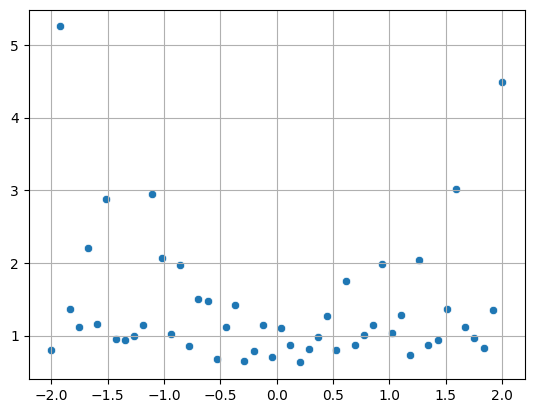

In [7]:
plt.figure()
sns.scatterplot(x=np.linspace(-2, 2, 50), y=losses)
plt.grid()
plt.show()
plt.close()

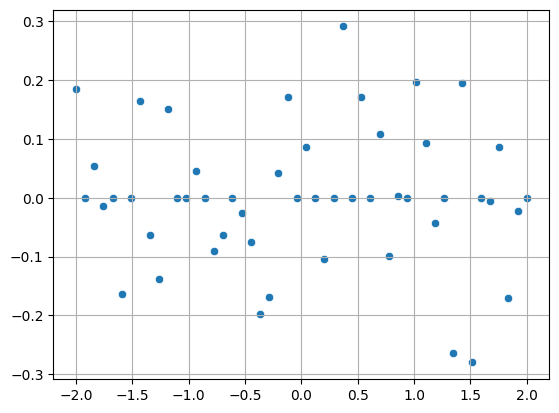

In [8]:
plt.figure()
sns.scatterplot(x=np.linspace(-2, 2, 50), y=correlation)
plt.grid()
plt.show()
plt.close()